# **Import the data from CCLE into a new Google Colab file**

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [16]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_W/week2/insurance.csv")

In [17]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

### CONVERT smoker and region. Investigate scikit .LabelEncoder
# smoker
df.loc[df['smoker'] == 'yes', 'smoker'] = 1 
df.loc[df['smoker'] == 'no', 'smoker'] = 0
#region
df['region1'] = df['region'] #southwest
df.loc[df['region1'] == 'southwest', 'region1'] = 1 
df.loc[df['region1'] == 'southeast', 'region1'] = 0 
df.loc[df['region1'] == 'northwest', 'region1'] = 0 
df.loc[df['region1'] == 'northeast', 'region1'] = 0

df['region2'] = df['region'] #southeast
df.loc[df['region2'] == 'southwest', 'region2'] = 0 
df.loc[df['region2'] == 'southeast', 'region2'] = 1 
df.loc[df['region2'] == 'northwest', 'region2'] = 0 
df.loc[df['region2'] == 'northeast', 'region2'] = 0

df['region3'] = df['region'] #northwest
df.loc[df['region3'] == 'southwest', 'region3'] = 0 
df.loc[df['region3'] == 'southeast', 'region3'] = 0 
df.loc[df['region3'] == 'northwest', 'region3'] = 1 
df.loc[df['region3'] == 'northeast', 'region3'] = 0

df['region4'] = df['region'] #northeast
df.loc[df['region4'] == 'southwest', 'region4'] = 0 
df.loc[df['region4'] == 'southeast', 'region4'] = 0 
df.loc[df['region4'] == 'northwest', 'region4'] = 0 
df.loc[df['region4'] == 'northeast', 'region4'] = 1

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region1,region2,region3,region4
0,19,1.0,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0.0,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,0.0,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,0.0,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,0.0,28.880,0,0,northwest,3866.85520,0,0,1,0


# **Split the data into 80/20, in/out sample**

In [19]:
import numpy as np

In [20]:
df1 = df[["age", "sex", "bmi", "children", "smoker", "region1", "region2", "region3"]]
data = np.array(df1)
target = np.array(df.iloc[:, -5:-4])

In [21]:
data

array([[19, 1.0, 27.9, ..., 1, 0, 0],
       [18, 0.0, 33.77, ..., 0, 1, 0],
       [28, 0.0, 33.0, ..., 0, 1, 0],
       ...,
       [18, 1.0, 36.85, ..., 0, 1, 0],
       [21, 1.0, 25.8, ..., 1, 0, 0],
       [61, 1.0, 29.07, ..., 0, 0, 1]], dtype=object)

In [22]:
target

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [23]:
cut = int((len(data) * .8) // 1)

In [24]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# **Normalize the Data**

In [25]:
from sklearn import preprocessing

In [26]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# **Get lambda from Lasso cross validation**

In [27]:
from sklearn.linear_model import LassoCV

In [28]:
modCV = LassoCV().fit(in_data_scale, in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
a = modCV.alpha_ #Optimized Lambda
a

115.9799859390741

# **Run a lasso regression with that Lambda**

In [30]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = a).fit(in_data_scale, in_target)
in_y_pred = model.predict(in_data_scale)
out_y_pred = model.predict(out_data_scale)

In [31]:
model.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 , -158.68185954,   -0.        ])

# **Visualize the coefficients**

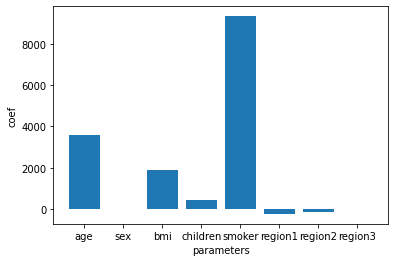

In [37]:
plt.bar(["age", "sex", "bmi", "children", "smoker", "region1", "region2", "region3"], model.coef_)
plt.xlabel("parameters")
plt.ylabel("coef")
plt.show()

# **Interpret the coefficients**

From the plot, we can conclude that \
**1.** Age has significant influence on buying health insurance.\
**2.** Sex has no influence on buying health insurance.\
**3.** Bmi has significantly influence the spending in health insurance.\
**4.** The family with children trend to spend more on health insurance.\
**5.** Smokers has strong influence to spend on health insurance.\
**6.** People live in southeast has more desire to buy health insurance.

# **Compare in and out of sample MSE’s**

In [35]:
from sklearn.metrics import mean_squared_error
out_sample_mse = mean_squared_error(out_y_pred, out_target)
in_sampe_mse = mean_squared_error(in_y_pred, in_target)

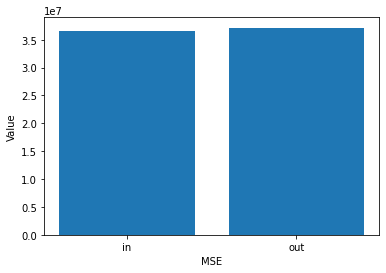

In [36]:
plt.bar(["in", "out"], [in_sampe_mse, out_sample_mse])
plt.xlabel("MSE")
plt.ylabel("Value")
plt.show()